In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('../../processed-data/tidy_socialmedia_data.csv', index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8687 entries, 1 to 12245
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Participant                      8687 non-null   int64  
 1   Date                             8687 non-null   object 
 2   Day                              8687 non-null   object 
 3   Time                             8687 non-null   object 
 4   Session.Name                     8687 non-null   object 
 5   Notification.No                  8687 non-null   int64  
 6   LifePak.Download.No              8687 non-null   int64  
 7   Responded                        8687 non-null   int64  
 8   Completed.Session                8687 non-null   int64  
 9   Session.Instance                 8687 non-null   float64
 10  Session.Instance.Response.Lapse  8687 non-null   object 
 11  Reminders.Delivered              8687 non-null   int64  
 12  Fatigue            

In [4]:
data['Date']= pd.to_datetime(data['Date'])

In [5]:
dailyMean = data.groupby(["Participant", "Date"], as_index=False)["LowMood"].mean()
display(dailyMean)

,Participant,Date,LowMood
0,115091,2017-05-02,33.000000
1,115091,2017-05-03,22.666667
2,115091,2017-05-04,28.833333
3,115091,2017-05-05,16.500000
4,115091,2017-05-06,32.200000
...,...,...,...
1722,9873359,2017-04-21,0.000000
1723,9873359,2017-04-22,2.714286
1724,9873359,2017-04-23,1.833333
1725,9873359,2017-04-24,1.666667


In [6]:
dailyMean.pivot(index='Participant', columns='Date', values='LowMood').to_csv('../../processed-data/testRM-ANOVA.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../processed-data/testRM-ANOVA.csv'

In [7]:
tidy_RMANOVA = pd.read_csv('../processed-data/testRM-ANOVA.csv', header=None)

FileNotFoundError: [Errno 2] File ../processed-data/testRM-ANOVA.csv does not exist: '../processed-data/testRM-ANOVA.csv'

In [8]:
display(tidy_RMANOVA.dropna(axis=1))

NameError: name 'tidy_RMANOVA' is not defined

In [ ]:
tidy_RMANOVA.to_csv('../processed-data/testRM-ANOVA.csv', index=False)

In [9]:
display(dailyMean)

,Participant,Date,LowMood
0,115091,2017-05-02,33.000000
1,115091,2017-05-03,22.666667
2,115091,2017-05-04,28.833333
3,115091,2017-05-05,16.500000
4,115091,2017-05-06,32.200000
...,...,...,...
1722,9873359,2017-04-21,0.000000
1723,9873359,2017-04-22,2.714286
1724,9873359,2017-04-23,1.833333
1725,9873359,2017-04-24,1.666667


In [23]:
test = dailyMean.drop('Date', axis=1)

pt = PowerTransformer()
print(pt.fit(test))


PowerTransformer(copy=True, method='yeo-johnson', standardize=True)


In [35]:
print(pt.transform(test))
normal_test = pt.transform(test)

[[-2.10532984  1.2441801 ]
 [-2.10532984  0.91983156]
 [-2.10532984  1.12542809]
 ...
 [ 1.52768504 -0.70992411]
 [ 1.52768504 -0.75037274]
 [ 1.52768504 -1.36362963]]


/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([469.,  92., 106., 141., 229., 247., 205., 148.,  76.,   8.]),
 array([-1.36362963, -1.00348626, -0.6433429 , -0.28319954,  0.07694383,
         0.43708719,  0.79723055,  1.15737392,  1.51751728,  1.87766064,
         2.23780401]),
 <a list of 10 Patch objects>)

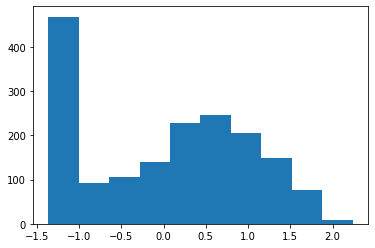

In [38]:
plt.hist(normal_test[:,1])